# EDA

In [1]:
import pandas as pd
import os

# Define the directory containing your CSV files
directory = '/home/iyed/FarmWise/tf-env/venv/food_prices'

# Get the list of all CSV files in the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Loop through each CSV file, load and display a preview of its contents
for file in csv_files:
    file_path = os.path.join(directory, file)
    print(f"Inspecting file: {file}")
    df = pd.read_csv(file_path)
    print(df.head())  # Show the first few rows of the dataset
    print(f"Shape of the data: {df.shape}")  # Get the number of rows and columns
    print("\n" + "-"*50 + "\n")


Inspecting file: peaches.csv
       Commodity  Year                Attribute      Value
0  Fresh peaches  1992  Retail-Price (cents/lb)  89.440000
1  Fresh peaches  1992    Farm-Price (cents/lb)  21.200000
2  Fresh peaches  1992       Farm share-Percent  25.216001
3  Fresh peaches  1993  Retail-Price (cents/lb)  94.840000
4  Fresh peaches  1993    Farm-Price (cents/lb)  22.100000
Shape of the data: (84, 4)

--------------------------------------------------

Inspecting file: veg_basket.csv
                 Commodity  Year                         Attribute       Value
0  Fresh vegetables basket  2010            Retail cost-2018 = 100   94.063687
1  Fresh vegetables basket  2010             Farm value-2018 = 100  101.272971
2  Fresh vegetables basket  2010  Farm-to-retail spread-2018 = 100   91.922938
3  Fresh vegetables basket  2010          Farm-value share-Percent   24.650409
4  Fresh vegetables basket  2011            Retail cost-2018 = 100   99.316699
Shape of the data: (52, 4)

---

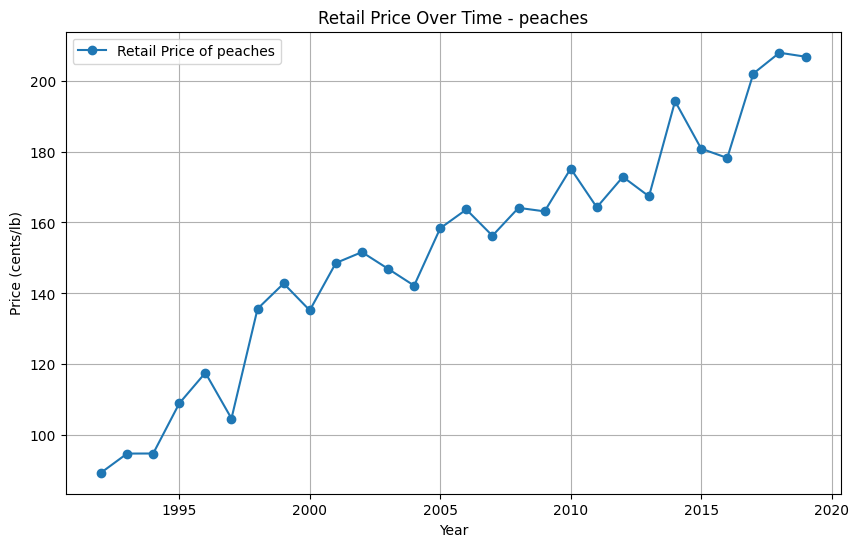

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Function to load and filter relevant data from the CSV files
def load_and_filter_data(file_path, attribute_filter):
    # Load the data into a DataFrame
    df = pd.read_csv(file_path)
    
    # Filter the data for specific attributes (e.g., Retail-Price)
    filtered_df = df[df['Attribute'].str.contains(attribute_filter, case=False, na=False)]
    
    return filtered_df

# Define the directory containing your CSV files
directory = '/home/iyed/FarmWise/tf-env/venv/food_prices'

# Get the list of all CSV files in the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Example: Visualize Retail prices for a commodity (e.g., peaches.csv)
commodity = "peaches.csv"
file_path = os.path.join(directory, commodity)
retail_data = load_and_filter_data(file_path, "Retail-Price")

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(retail_data['Year'], retail_data['Value'], marker='o', label=f"Retail Price of {commodity.replace('.csv', '')}")
plt.title(f'Retail Price Over Time - {commodity.replace(".csv", "")}')
plt.xlabel('Year')
plt.ylabel('Price (cents/lb)')
plt.grid(True)
plt.legend()
plt.show()

# You can repeat the process for other commodities or attributes by changing the commodity and attribute_filter.


In [4]:
pwd

'/home/iyed/FarmWise/tf-env/venv/food_prices'

# Filed Crops

Flour Dataset:
                              Commodity  Year             Attribute      Value
0  Flour, white, all-purpose, per pound  2000  Retail price-Dollars   0.290250
1  Flour, white, all-purpose, per pound  2000    Farm value-Dollars   0.047989
2  Flour, white, all-purpose, per pound  2000    Farm share-Percent  16.533682
3  Flour, white, all-purpose, per pound  2001  Retail price-Dollars   0.302333
4  Flour, white, all-purpose, per pound  2001    Farm value-Dollars   0.052720 

Vegetable Oil Dataset:
                             Commodity  Year             Attribute      Value
0  Vegetable (soybean) oil, per gallon  2008  Retail price-Dollars   7.851901
1  Vegetable (soybean) oil, per gallon  2008    Farm value-Dollars   3.530143
2  Vegetable (soybean) oil, per gallon  2008    Farm share-Percent  44.959086
3  Vegetable (soybean) oil, per gallon  2009  Retail price-Dollars   7.324905
4  Vegetable (soybean) oil, per gallon  2009    Farm value-Dollars   2.414359 

Sugar Dataset:
 

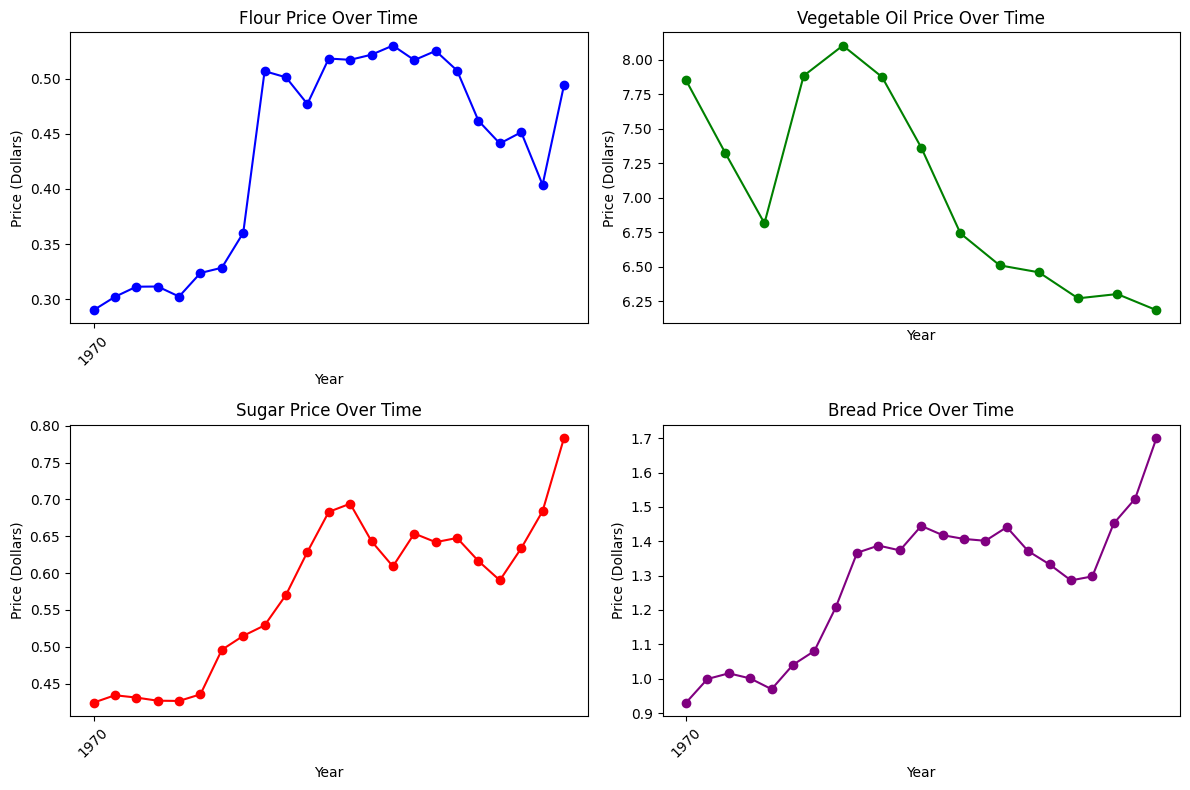

In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
flour_df = pd.read_csv('flour.csv')
oil_df = pd.read_csv('vegetable_oil.csv')
sugar_df = pd.read_csv('sugar.csv')
bread_df = pd.read_csv('bread.csv')

# Inspect the first few rows of each dataset to understand their structure
print("Flour Dataset:")
print(flour_df.head(), "\n")

print("Vegetable Oil Dataset:")
print(oil_df.head(), "\n")

print("Sugar Dataset:")
print(sugar_df.head(), "\n")

print("Bread Dataset:")
print(bread_df.head(), "\n")

# Check for missing values in each dataset
print("Flour missing values:")
print(flour_df.isnull().sum(), "\n")

print("Vegetable Oil missing values:")
print(oil_df.isnull().sum(), "\n")

print("Sugar missing values:")
print(sugar_df.isnull().sum(), "\n")

print("Bread missing values:")
print(bread_df.isnull().sum(), "\n")

# Clean the data (Example: Convert 'Year' column to datetime if it's not already)
flour_df['Year'] = pd.to_datetime(flour_df['Year'], errors='coerce')
oil_df['Year'] = pd.to_datetime(oil_df['Year'], errors='coerce')
sugar_df['Year'] = pd.to_datetime(sugar_df['Year'], errors='coerce')
bread_df['Year'] = pd.to_datetime(bread_df['Year'], errors='coerce')

# Filter the data for relevant columns (e.g., Year, Attribute, Value)
flour_price_df = flour_df[flour_df['Attribute'].str.contains("price", case=False)]
oil_price_df = oil_df[oil_df['Attribute'].str.contains("price", case=False)]
sugar_price_df = sugar_df[sugar_df['Attribute'].str.contains("price", case=False)]
bread_price_df = bread_df[bread_df['Attribute'].str.contains("price", case=False)]

# Plot the data: Price over Time for each commodity
plt.figure(figsize=(12, 8))

# Plot for Flour
plt.subplot(2, 2, 1)
plt.plot(flour_price_df['Year'], flour_price_df['Value'], marker='o', linestyle='-', color='b')
plt.title('Flour Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price (Dollars)')
plt.xticks(rotation=45)

# Plot for Vegetable Oil
plt.subplot(2, 2, 2)
plt.plot(oil_price_df['Year'], oil_price_df['Value'], marker='o', linestyle='-', color='g')
plt.title('Vegetable Oil Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price (Dollars)')
plt.xticks(rotation=45)

# Plot for Sugar
plt.subplot(2, 2, 3)
plt.plot(sugar_price_df['Year'], sugar_price_df['Value'], marker='o', linestyle='-', color='r')
plt.title('Sugar Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price (Dollars)')
plt.xticks(rotation=45)

# Plot for Bread
plt.subplot(2, 2, 4)
plt.plot(bread_price_df['Year'], bread_price_df['Value'], marker='o', linestyle='-', color='purple')
plt.title('Bread Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price (Dollars)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [7]:
bread_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Commodity  69 non-null     object        
 1   Year       69 non-null     datetime64[ns]
 2   Attribute  69 non-null     object        
 3   Value      69 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.3+ KB


In [13]:
for col in bread_df.columns:
    print(col,':',bread_df[col].nunique())

Commodity : 1
Year : 23
Attribute : 3
Value : 69


In [16]:
bread_df['Attribute'].unique()

array(['Retail price-Dollars', 'Farm value-Dollars', 'Farm share-Percent'],
      dtype=object)

In [17]:
bread_df.head()

,Commodity,Year,Attribute,Value
0,"White pan bread, per pound",1970-01-01 00:00:00.000002000,Retail price-Dollars,0.930167
1,"White pan bread, per pound",1970-01-01 00:00:00.000002000,Farm value-Dollars,0.031622
2,"White pan bread, per pound",1970-01-01 00:00:00.000002000,Farm share-Percent,3.399629
3,"White pan bread, per pound",1970-01-01 00:00:00.000002001,Retail price-Dollars,0.999083
4,"White pan bread, per pound",1970-01-01 00:00:00.000002001,Farm value-Dollars,0.034411


,Commodity,Year,Attribute,Value
0,Fresh grapefruit,1992/93,Retail-Price (Cents/lb),54.858333
1,Fresh grapefruit,1992/93,Farm-Price (Cents/lb),7.227188
2,Fresh grapefruit,1992/93,Farm share-Percent,13.581727
3,Fresh grapefruit,1993/94,Retail-Price (Cents/lb),52.150000
4,Fresh grapefruit,1993/94,Farm-Price (Cents/lb),7.990884
...,...,...,...,...
79,Fresh grapefruit,2018/19,Farm-Price (Cents/lb),26.228571
80,Fresh grapefruit,2018/19,Farm share-Percent,19.899250
81,Fresh grapefruit,2019/20,Retail-Price (Cents/lb),129.750000
82,Fresh grapefruit,2019/20,Farm-Price (Cents/lb),19.110924


In [19]:
crop_yield = [flour_price_df, 
oil_price_df ,
sugar_price_df,
bread_price_df,]


In [20]:
for data in crop_yield:
    for col in data :
        print('column_name: ', col ,'number of unique values', data[col].nunique() ) 
        print('**'*15)

column_name:  Commodity number of unique values 1
******************************
column_name:  Year number of unique values 23
******************************
column_name:  Attribute number of unique values 1
******************************
column_name:  Value number of unique values 23
******************************
column_name:  Commodity number of unique values 1
******************************
column_name:  Year number of unique values 13
******************************
column_name:  Attribute number of unique values 1
******************************
column_name:  Value number of unique values 13
******************************
column_name:  Commodity number of unique values 1
******************************
column_name:  Year number of unique values 23
******************************
column_name:  Attribute number of unique values 1
******************************
column_name:  Value number of unique values 23
******************************
column_name:  Commodity number of unique values 1

In [22]:
import pandas as pd

# Assuming your individual datasets are already loaded as:
# flour_price_df, oil_price_df, sugar_price_df, bread_price_df

# Create a copy of each DataFrame to avoid modifying the original
flour_price_df = flour_price_df.copy()
oil_price_df = oil_price_df.copy()
sugar_price_df = sugar_price_df.copy()
bread_price_df = bread_price_df.copy()

# Add a column for Commodity in each dataset
flour_price_df['Commodity'] = 'Flour'
oil_price_df['Commodity'] = 'Vegetable Oil'
sugar_price_df['Commodity'] = 'Sugar'
bread_price_df['Commodity'] = 'Bread'

# Concatenate all datasets
combined_df = pd.concat([flour_price_df, oil_price_df, sugar_price_df, bread_price_df], ignore_index=True)

# Show the first few rows of the combined dataset
print(combined_df.head())


  Commodity                          Year             Attribute     Value
0     Flour 1970-01-01 00:00:00.000002000  Retail price-Dollars  0.290250
1     Flour 1970-01-01 00:00:00.000002001  Retail price-Dollars  0.302333
2     Flour 1970-01-01 00:00:00.000002002  Retail price-Dollars  0.311500
3     Flour 1970-01-01 00:00:00.000002003  Retail price-Dollars  0.311667
4     Flour 1970-01-01 00:00:00.000002004  Retail price-Dollars  0.302583


In [23]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Commodity  82 non-null     object        
 1   Year       82 non-null     datetime64[ns]
 2   Attribute  82 non-null     object        
 3   Value      82 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 2.7+ KB


In [27]:
for col in combined_df.columns:
    print('column_name: ', col ,'||| number of unique values', combined_df[col].nunique() ) 
    print('**'*15)

column_name:  Commodity ||| number of unique values 4
******************************
column_name:  Year ||| number of unique values 23
******************************
column_name:  Attribute ||| number of unique values 1
******************************
column_name:  Value ||| number of unique values 82
******************************


In [28]:
# Basic statistics for all numerical columns
print(combined_df.describe())


                                Year      Value
count                             82  82.000000
mean   1970-01-01 00:00:00.000002011   1.758880
min       1970-01-01 00:00:00.000002   0.290250
25%    1970-01-01 00:00:00.000002006   0.497146
50%    1970-01-01 00:00:00.000002012   0.650583
75%    1970-01-01 00:00:00.000002017   1.397792
max    1970-01-01 00:00:00.000002022   8.103642
std                              NaN   2.356689


In [32]:
import pandas as pd
import numpy as np

# Assuming 'combined_df' is your combined DataFrame with 'Commodity', 'Year', 'Attribute', and 'Value' columns

# Encode the categorical column 'Commodity'
df_encoded = pd.get_dummies(combined_df, columns=['Commodity'], drop_first=True)

# Check if there are columns with a single unique value, and drop them
df_filtered = df_encoded.loc[:, df_encoded.nunique() > 1]

# Now, calculate the correlation matrix
correlation_matrix = df_filtered.corr()

# Print the correlation matrix
print(correlation_matrix)


                             Year     Value  Commodity_Flour  Commodity_Sugar  \
Year                     1.000000  0.188757        -0.046694        -0.046694   
Value                    0.188757  1.000000        -0.354078        -0.315918   
Commodity_Flour         -0.046694 -0.354078         1.000000        -0.389831   
Commodity_Sugar         -0.046694 -0.315918        -0.389831         1.000000   
Commodity_Vegetable Oil  0.172295  0.981016        -0.271010        -0.271010   

                         Commodity_Vegetable Oil  
Year                                    0.172295  
Value                                   0.981016  
Commodity_Flour                        -0.271010  
Commodity_Sugar                        -0.271010  
Commodity_Vegetable Oil                 1.000000  


In [33]:
correlation_matrix

,Year,Value,Commodity_Flour,Commodity_Sugar,Commodity_Vegetable Oil
Year,1.000000,0.188757,-0.046694,-0.046694,0.172295
Value,0.188757,1.000000,-0.354078,-0.315918,0.981016
Commodity_Flour,-0.046694,-0.354078,1.000000,-0.389831,-0.271010
Commodity_Sugar,-0.046694,-0.315918,-0.389831,1.000000,-0.271010
Commodity_Vegetable Oil,0.172295,0.981016,-0.271010,-0.271010,1.000000


In [35]:
sugar_price_df.describe()

,Year,Value
count,23,23.000000
mean,1970-01-01 00:00:00.000002011,0.573728
min,1970-01-01 00:00:00.000002,0.424083
25%,1970-01-01 00:00:00.000002005,0.465625
50%,1970-01-01 00:00:00.000002011,0.609000
75%,1970-01-01 00:00:00.000002016,0.645375
max,1970-01-01 00:00:00.000002022,0.783167
std,NaN,0.106579


In [36]:
sugar_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 0 to 66
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Commodity  23 non-null     object        
 1   Year       23 non-null     datetime64[ns]
 2   Attribute  23 non-null     object        
 3   Value      23 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 920.0+ bytes


In [38]:
sugar_price_df['Attribute'].unique()

array(['Retail price-Dollars'], dtype=object)

In [41]:
oil_price_df['Attribute'].nunique()

1

In [42]:
import pandas as pd

# Import the four datasets
flour_price_df = pd.read_csv('flour.csv')
vegetable_oil_price_df = pd.read_csv('vegetable_oil.csv')
sugar_price_df = pd.read_csv('sugar.csv')
bread_price_df = pd.read_csv('bread.csv')

# Display the first few rows of each dataframe to ensure they were loaded correctly
print("Flour Dataset:")
print(flour_price_df.head())

print("\nVegetable Oil Dataset:")
print(vegetable_oil_price_df.head())

print("\nSugar Dataset:")
print(sugar_price_df.head())

print("\nBread Dataset:")
print(bread_price_df.head())


Flour Dataset:
                              Commodity  Year             Attribute      Value
0  Flour, white, all-purpose, per pound  2000  Retail price-Dollars   0.290250
1  Flour, white, all-purpose, per pound  2000    Farm value-Dollars   0.047989
2  Flour, white, all-purpose, per pound  2000    Farm share-Percent  16.533682
3  Flour, white, all-purpose, per pound  2001  Retail price-Dollars   0.302333
4  Flour, white, all-purpose, per pound  2001    Farm value-Dollars   0.052720

Vegetable Oil Dataset:
                             Commodity  Year             Attribute      Value
0  Vegetable (soybean) oil, per gallon  2008  Retail price-Dollars   7.851901
1  Vegetable (soybean) oil, per gallon  2008    Farm value-Dollars   3.530143
2  Vegetable (soybean) oil, per gallon  2008    Farm share-Percent  44.959086
3  Vegetable (soybean) oil, per gallon  2009  Retail price-Dollars   7.324905
4  Vegetable (soybean) oil, per gallon  2009    Farm value-Dollars   2.414359

Sugar Dataset:
   

In [43]:
bread_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Commodity  69 non-null     object 
 1   Year       69 non-null     int64  
 2   Attribute  69 non-null     object 
 3   Value      69 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


In [49]:
bread_price_df['Attribute'].unique()

array(['Retail price-Dollars', 'Farm value-Dollars', 'Farm share-Percent'],
      dtype=object)

In [52]:
# Assuming you already have the dataframes: flour_price_df, vegetable_oil_price_df, sugar_price_df, bread_price_df

# Extract the unique values from the 'Attribute' column in each dataset
flour_attributes = flour_price_df['Attribute'].unique()
vegetable_oil_attributes = vegetable_oil_price_df['Attribute'].unique()
sugar_attributes = sugar_price_df['Attribute'].unique()
bread_attributes = bread_price_df['Attribute'].unique()

# Print the unique attributes for each dataset
print("Unique attributes in Flour dataset:", flour_attributes)
print("Unique attributes in Vegetable Oil dataset:", vegetable_oil_attributes)
print("Unique attributes in Sugar dataset:", sugar_attributes)
print("Unique attributes in Bread dataset:", bread_attributes)

# Check if all the attributes are the same across all datasets
attributes_set = set(flour_attributes) & set(vegetable_oil_attributes) & set(sugar_attributes) & set(bread_attributes)

# Print the common attributes
print("Common Attributes across all datasets:", attributes_set)

# Check if all datasets have exactly the same attributes
if len(attributes_set) == len(flour_attributes) == len(vegetable_oil_attributes) == len(sugar_attributes) == len(bread_attributes):
    print("All datasets have the same attributes.")
else:
    print("The datasets have different attributes.")


Unique attributes in Flour dataset: ['Retail price-Dollars' 'Farm value-Dollars' 'Farm share-Percent']
Unique attributes in Vegetable Oil dataset: ['Retail price-Dollars' 'Farm value-Dollars' 'Farm share-Percent']
Unique attributes in Sugar dataset: ['Retail price-Dollars' 'Farm value-Dollars' 'Farm share-Percent']
Unique attributes in Bread dataset: ['Retail price-Dollars' 'Farm value-Dollars' 'Farm share-Percent']
Common Attributes across all datasets: {'Retail price-Dollars', 'Farm share-Percent', 'Farm value-Dollars'}
All datasets have the same attributes.


In [53]:
import pandas as pd

# Assuming you already have the individual datasets loaded as DataFrames:
# flour_price_df, vegetable_oil_price_df, sugar_price_df, bread_price_df

# List of datasets
datasets = [flour_price_df, vegetable_oil_price_df, sugar_price_df, bread_price_df]

# Extract unique attributes from each dataset and print
unique_attributes = []
for idx, df in enumerate(datasets):
    unique_attr = df['Attribute'].unique()
    print(f"Unique attributes in dataset {idx + 1}: {unique_attr}")
    unique_attributes.append(set(unique_attr))  # Convert to set for easy comparison

# Find common attributes across all datasets
common_attributes = set.intersection(*unique_attributes)

# Print the common attributes
print("\nCommon Attributes across all datasets:", common_attributes)

# Check if all datasets have the same attributes
if len(common_attributes) == len(unique_attributes[0]):
    print("\nAll datasets have the same attributes.")
else:
    print("\nThere are discrepancies in attributes across datasets.")


Unique attributes in dataset 1: ['Retail price-Dollars' 'Farm value-Dollars' 'Farm share-Percent']
Unique attributes in dataset 2: ['Retail price-Dollars' 'Farm value-Dollars' 'Farm share-Percent']
Unique attributes in dataset 3: ['Retail price-Dollars' 'Farm value-Dollars' 'Farm share-Percent']
Unique attributes in dataset 4: ['Retail price-Dollars' 'Farm value-Dollars' 'Farm share-Percent']

Common Attributes across all datasets: {'Retail price-Dollars', 'Farm share-Percent', 'Farm value-Dollars'}

All datasets have the same attributes.


In [60]:
import pandas as pd

# Assuming the following DataFrames are already defined:
# flour_price_df, vegetable_oil_price_df, sugar_price_df, bread_price_df

# Assign Commodity column to each dataset
flour_price_df['Commodity'] = 'Flour'
vegetable_oil_price_df['Commodity'] = 'Vegetable Oil'
sugar_price_df['Commodity'] = 'Sugar'
bread_price_df['Commodity'] = 'Bread'

# Combine all the datasets into one
combined_df = pd.concat([flour_price_df, vegetable_oil_price_df, sugar_price_df, bread_price_df], ignore_index=True)

# Optional: To reset the index and keep it sequential
combined_df.reset_index(drop=True, inplace=True)

# Display the combined DataFrame
print(combined_df.head())


  Commodity  Year             Attribute      Value
0     Flour  2000  Retail price-Dollars   0.290250
1     Flour  2000    Farm value-Dollars   0.047989
2     Flour  2000    Farm share-Percent  16.533682
3     Flour  2001  Retail price-Dollars   0.302333
4     Flour  2001    Farm value-Dollars   0.052720


In [61]:
for c in combined_df.columns:
    print(combined_df[c].nunique())


4
23
3
246


In [57]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Commodity  246 non-null    object 
 1   Year       246 non-null    int64  
 2   Attribute  246 non-null    object 
 3   Value      246 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 7.8+ KB


In [62]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'combined_df' is your DataFrame containing all the data

# 1. Set 'Year' as the index for forecasting
combined_df.set_index('Year', inplace=True)

# 2. One-hot encoding for 'Commodity' and 'Attribute' columns
combined_df = pd.get_dummies(combined_df, columns=['Commodity', 'Attribute'], drop_first=True)

# 3. Normalize the 'Value' column using Min-Max scaling
scaler = MinMaxScaler()
combined_df['Value'] = scaler.fit_transform(combined_df[['Value']])

# Display the resulting DataFrame
print(combined_df.head())

# Display DataFrame info to verify changes
print(combined_df.info())


         Value  Commodity_Flour  Commodity_Sugar  Commodity_Vegetable Oil  \
Year                                                                        
2000  0.005047             True            False                    False   
2000  0.000319             True            False                    False   
2000  0.322040             True            False                    False   
2001  0.005283             True            False                    False   
2001  0.000412             True            False                    False   

      Attribute_Farm value-Dollars  Attribute_Retail price-Dollars  
Year                                                                
2000                         False                            True  
2000                          True                           False  
2000                         False                           False  
2001                         False                            True  
2001                          True            

In [63]:
combined_df.head()

,Value,Commodity_Flour,Commodity_Sugar,Commodity_Vegetable Oil,Attribute_Farm value-Dollars,Attribute_Retail price-Dollars
Year,,,,,,
2000,0.005047,True,False,False,False,True
2000,0.000319,True,False,False,True,False
2000,0.322040,True,False,False,False,False
2001,0.005283,True,False,False,False,True
2001,0.000412,True,False,False,True,False


In [64]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load all datasets (update the paths if necessary)
flour_price_df = pd.read_csv('flour.csv')
vegetable_oil_price_df = pd.read_csv('vegetable_oil.csv')
sugar_price_df = pd.read_csv('sugar.csv')
bread_price_df = pd.read_csv('bread.csv')

# Step 1: Add the 'Commodity' column for each dataset
flour_price_df['Commodity'] = 'Flour'
vegetable_oil_price_df['Commodity'] = 'Vegetable Oil'
sugar_price_df['Commodity'] = 'Sugar'
bread_price_df['Commodity'] = 'Bread'

# Step 2: Combine all datasets into one
combined_df = pd.concat([flour_price_df, vegetable_oil_price_df, sugar_price_df, bread_price_df], ignore_index=True)

# Step 3: Ensure 'Year' column is properly set and 'Commodity' and 'Attribute' are consistent
print("Unique Attributes in Flour dataset:", flour_price_df['Attribute'].unique())
print("Unique Attributes in Vegetable Oil dataset:", vegetable_oil_price_df['Attribute'].unique())
print("Unique Attributes in Sugar dataset:", sugar_price_df['Attribute'].unique())
print("Unique Attributes in Bread dataset:", bread_price_df['Attribute'].unique())

# Ensure the 'Commodity' and 'Attribute' columns are in the correct format
# For example, if some datasets lack the 'Commodity' or 'Attribute' columns,
# we make sure they exist in the combined DataFrame.

# Step 4: One-hot encode 'Commodity' and 'Attribute' columns
combined_df = pd.get_dummies(combined_df, columns=['Commodity', 'Attribute'], drop_first=True)

# Step 5: Normalize the 'Value' column using Min-Max scaling
scaler = MinMaxScaler()
combined_df['Value'] = scaler.fit_transform(combined_df[['Value']])

# Step 6: Set 'Year' as the index for forecasting purposes
combined_df.set_index('Year', inplace=True)

# Step 7: Display the final DataFrame
print(combined_df.head())

# Check the DataFrame info to verify that columns are correctly encoded
print(combined_df.info())


Unique Attributes in Flour dataset: ['Retail price-Dollars' 'Farm value-Dollars' 'Farm share-Percent']
Unique Attributes in Vegetable Oil dataset: ['Retail price-Dollars' 'Farm value-Dollars' 'Farm share-Percent']
Unique Attributes in Sugar dataset: ['Retail price-Dollars' 'Farm value-Dollars' 'Farm share-Percent']
Unique Attributes in Bread dataset: ['Retail price-Dollars' 'Farm value-Dollars' 'Farm share-Percent']
         Value  Commodity_Flour  Commodity_Sugar  Commodity_Vegetable Oil  \
Year                                                                        
2000  0.005047             True            False                    False   
2000  0.000319             True            False                    False   
2000  0.322040             True            False                    False   
2001  0.005283             True            False                    False   
2001  0.000412             True            False                    False   

      Attribute_Farm value-Dollars  Attr

In [65]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 2000 to 2022
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Value                           246 non-null    float64
 1   Commodity_Flour                 246 non-null    bool   
 2   Commodity_Sugar                 246 non-null    bool   
 3   Commodity_Vegetable Oil         246 non-null    bool   
 4   Attribute_Farm value-Dollars    246 non-null    bool   
 5   Attribute_Retail price-Dollars  246 non-null    bool   
dtypes: bool(5), float64(1)
memory usage: 5.0 KB


In [68]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the datasets
flour_price_df = pd.read_csv('flour.csv')
vegetable_oil_price_df = pd.read_csv('vegetable_oil.csv')
sugar_price_df = pd.read_csv('sugar.csv')
bread_price_df = pd.read_csv('bread.csv')

# Step 1: Assign the 'Commodity' column for each dataset
flour_price_df['Commodity'] = 'Flour'
vegetable_oil_price_df['Commodity'] = 'Vegetable Oil'
sugar_price_df['Commodity'] = 'Sugar'
bread_price_df['Commodity'] = 'Bread'

# Step 2: Combine all the datasets into one DataFrame
combined_df = pd.concat([flour_price_df, vegetable_oil_price_df, sugar_price_df, bread_price_df], ignore_index=True)

# Step 3: One-hot encoding for 'Commodity' and 'Attribute' columns
combined_df = pd.get_dummies(combined_df, columns=['Commodity', 'Attribute'], drop_first=True)

# Step 4: Normalize the 'Value' column using Min-Max scaling
scaler = MinMaxScaler()
combined_df['Value'] = scaler.fit_transform(combined_df[['Value']])

# Step 5: Set 'Year' as the index for forecasting
combined_df.set_index('Year', inplace=True)

# Step 6: Ensure that all expected columns exist in the DataFrame
expected_columns = [
    'Value',
    'Commodity_Flour', 'Commodity_Sugar', 'Commodity_Vegetable Oil', 'Commodity_Bread',
    'Attribute_Retail price-Dollars', 'Attribute_Farm value-Dollars', 'Attribute_Farm share-Percent'
]

# Add missing columns with default values (0 or False)
for column in expected_columns:
    if column not in combined_df.columns:
        if 'Commodity' in column:  # Commodity columns should be boolean (False)
            combined_df[column] = False
        else:  # Attribute columns should be boolean (False)
            combined_df[column] = False

# Step 7: Reorder the columns to match the expected order
columns_order = [
    'Value',
    'Commodity_Flour', 'Commodity_Sugar', 'Commodity_Vegetable Oil', 'Commodity_Bread',
    'Attribute_Retail price-Dollars', 'Attribute_Farm value-Dollars', 'Attribute_Farm share-Percent'
]
combined_df = combined_df[columns_order]

# Display the resulting DataFrame
print(combined_df.head())

# Display DataFrame info to verify changes
print(combined_df.info())


         Value  Commodity_Flour  Commodity_Sugar  Commodity_Vegetable Oil  \
Year                                                                        
2000  0.005047             True            False                    False   
2000  0.000319             True            False                    False   
2000  0.322040             True            False                    False   
2001  0.005283             True            False                    False   
2001  0.000412             True            False                    False   

      Commodity_Bread  Attribute_Retail price-Dollars  \
Year                                                    
2000            False                            True   
2000            False                           False   
2000            False                           False   
2001            False                            True   
2001            False                           False   

      Attribute_Farm value-Dollars  Attribute_Farm share-Per

In [70]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246 entries, 2000 to 2022
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Value                           246 non-null    float64
 1   Commodity_Flour                 246 non-null    bool   
 2   Commodity_Sugar                 246 non-null    bool   
 3   Commodity_Vegetable Oil         246 non-null    bool   
 4   Commodity_Bread                 246 non-null    bool   
 5   Attribute_Retail price-Dollars  246 non-null    bool   
 6   Attribute_Farm value-Dollars    246 non-null    bool   
 7   Attribute_Farm share-Percent    246 non-null    bool   
dtypes: bool(7), float64(1)
memory usage: 5.5 KB


In [72]:
len(sugar_price_df) * 4 

276

In [73]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the datasets
flour_price_df = pd.read_csv('flour.csv')
vegetable_oil_price_df = pd.read_csv('vegetable_oil.csv')
sugar_price_df = pd.read_csv('sugar.csv')
bread_price_df = pd.read_csv('bread.csv')

# Function to prepare each dataset
def prepare_dataset(df, commodity_name):
    # Add the 'Commodity' column
    df['Commodity'] = commodity_name

    # One-hot encode 'Commodity' and 'Attribute' columns
    df = pd.get_dummies(df, columns=['Commodity', 'Attribute'], drop_first=True)

    # Normalize the 'Value' column using Min-Max scaling
    scaler = MinMaxScaler()
    df['Value'] = scaler.fit_transform(df[['Value']])

    return df

# Prepare each dataset
flour_price_encoded = prepare_dataset(flour_price_df, 'Flour')
vegetable_oil_price_encoded = prepare_dataset(vegetable_oil_price_df, 'Vegetable Oil')
sugar_price_encoded = prepare_dataset(sugar_price_df, 'Sugar')
bread_price_encoded = prepare_dataset(bread_price_df, 'Bread')

# Combine all the datasets into one DataFrame
combined_df = pd.concat([flour_price_encoded, vegetable_oil_price_encoded, sugar_price_encoded, bread_price_encoded], ignore_index=True)

# Set 'Year' as the index for forecasting
combined_df.set_index('Year', inplace=True)

# Ensure all expected columns exist in the DataFrame
expected_columns = [
    'Value',
    'Commodity_Flour', 'Commodity_Sugar', 'Commodity_Vegetable Oil', 'Commodity_Bread',
    'Attribute_Retail price-Dollars', 'Attribute_Farm value-Dollars', 'Attribute_Farm share-Percent'
]

# Add missing columns with default values (0 or False)
for column in expected_columns:
    if column not in combined_df.columns:
        if 'Commodity' in column:  # Commodity columns should be boolean (False)
            combined_df[column] = False
        else:  # Attribute columns should be boolean (False)
            combined_df[column] = False

# Reorder the columns to match the expected order
columns_order = [
    'Value',
    'Commodity_Flour', 'Commodity_Sugar', 'Commodity_Vegetable Oil', 'Commodity_Bread',
    'Attribute_Retail price-Dollars', 'Attribute_Farm value-Dollars', 'Attribute_Farm share-Percent'
]
combined_df = combined_df[columns_order]

# Display the resulting DataFrame
print(combined_df.head())

# Display DataFrame info to verify changes
print(combined_df.info())


         Value  Commodity_Flour  Commodity_Sugar  Commodity_Vegetable Oil  \
Year                                                                        
2000  0.007346            False            False                    False   
2000  0.000000            False            False                    False   
2000  0.499916            False            False                    False   
2001  0.007713            False            False                    False   
2001  0.000143            False            False                    False   

      Commodity_Bread  Attribute_Retail price-Dollars  \
Year                                                    
2000            False                            True   
2000            False                           False   
2000            False                           False   
2001            False                            True   
2001            False                           False   

      Attribute_Farm value-Dollars  Attribute_Farm share-Per

In [74]:
combined_df.to_csv('crop_yield')


In [75]:
combined_df.head()

,Value,Commodity_Flour,Commodity_Sugar,Commodity_Vegetable Oil,Commodity_Bread,Attribute_Retail price-Dollars,Attribute_Farm value-Dollars,Attribute_Farm share-Percent
Year,,,,,,,,
2000,0.007346,False,False,False,False,True,False,False
2000,0.000000,False,False,False,False,False,True,False
2000,0.499916,False,False,False,False,False,False,False
2001,0.007713,False,False,False,False,True,False,False
2001,0.000143,False,False,False,False,False,True,False


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error

# Step 1: Data Preparation
# Assuming you already have your combined_df DataFrame

# Set 'Year' as the index
combined_df.set_index('Year', inplace=True)

# Normalize 'Value' column
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(combined_df[['Value']])

# Convert the dataframe to supervised learning format (with time steps)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step, 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Define time steps (how many previous time steps to use for prediction)
time_step = 10

# Prepare the dataset
X, y = create_dataset(scaled_values, time_step)

# Reshape X to be 3D [samples, time_steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the dataset into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 2: Build the LSTM Model
model = Sequential()

# LSTM Layer
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))

# Dense Layer (Output layer)
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 3: Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 4: Model Evaluation and Prediction
predicted_values = model.predict(X_test)

# Inverse scaling to get the actual predicted values
predicted_values = scaler.inverse_transform(predicted_values)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate the model performance (Mean Absolute Error)
mae = mean_absolute_error(y_test_actual, predicted_values)
print(f'Mean Absolute Error: {mae}')

# Step 5: Plotting the results
plt.figure(figsize=(10,6))
plt.plot(y_test_actual, label='Actual Values')
plt.plot(predicted_values, label='Predicted Values')
plt.title('LSTM Model - Predicted vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()



2025-02-24 15:08:07.944803: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-24 15:08:08.404402: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-24 15:08:08.406453: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-24 15:08:09.216034: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


KeyError: "None of ['Year'] are in the columns"

   Year     Value  Commodity_Flour  Commodity_Sugar  Commodity_Vegetable Oil  \
0  2000  0.007346            False            False                    False   
1  2000  0.000000            False            False                    False   
2  2000  0.499916            False            False                    False   
3  2001  0.007713            False            False                    False   
4  2001  0.000143            False            False                    False   

   Commodity_Bread  Attribute_Retail price-Dollars  \
0            False                            True   
1            False                           False   
2            False                           False   
3            False                            True   
4            False                           False   

   Attribute_Farm value-Dollars  Attribute_Farm share-Percent  
0                         False                         False  
1                          True                         False  
2 

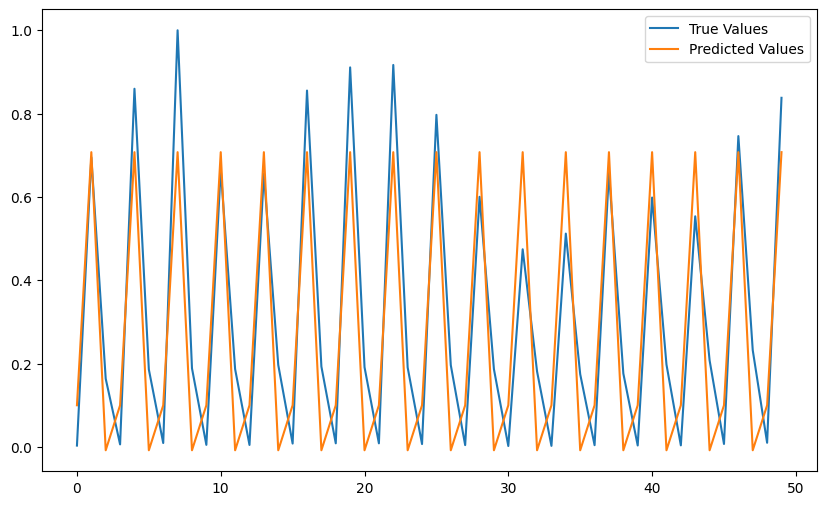

Mean Squared Error on Test Set: 0.023493461558236083


In [81]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming combined_df is already prepared as per your previous steps
# Reset the index to include 'Year' as a regular column
combined_df.reset_index(inplace=True)

# Check the first few rows to ensure 'Year' is now a column
print(combined_df.head())

# Step 1: Feature preparation
# Select relevant features (Value is the target variable)
features = combined_df.drop(columns=['Value', 'Year'])

# Target variable
target = combined_df['Value']

# Step 2: Normalize the features and target
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

# Step 3: Reshape data for LSTM input (samples, time steps, features)
X = scaled_features
y = scaled_target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape the data to fit LSTM input format
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Step 5: Train the LSTM model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Make predictions
predictions = model.predict(X_test)

# Step 7: Inverse transform the predictions and the actual values
y_test_inv = scaler.inverse_transform(y_test)
predictions_inv = scaler.inverse_transform(predictions)

# Step 8: Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='True Values')
plt.plot(predictions_inv, label='Predicted Values')
plt.legend()
plt.show()

# Optionally, print out the model performance
print(f'Mean Squared Error on Test Set: {np.mean((predictions_inv - y_test_inv) ** 2)}')


In [78]:
print(combined_df.columns)


Index(['Value', 'Commodity_Flour', 'Commodity_Sugar',
       'Commodity_Vegetable Oil', 'Commodity_Bread',
       'Attribute_Retail price-Dollars', 'Attribute_Farm value-Dollars',
       'Attribute_Farm share-Percent'],
      dtype='object')


In [79]:
combined_df.reset_index(inplace=True)


In [82]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming combined_df is already prepared and the 'Year' column is now available
combined_df.reset_index(inplace=True)

# Split the data by commodity type
commodities = ['Flour', 'Sugar', 'Vegetable Oil', 'Bread']

# Dictionary to store models and predictions for each commodity
models = {}
predictions = {}
true_values = {}

# Train and predict for each commodity
for commodity in commodities:
    print(f"Training model for {commodity}...")
    
    # Filter the dataset for the current commodity
    commodity_df = combined_df[combined_df[f'Commodity_{commodity}'] == True]
    
    # Prepare the features and target variable for the commodity
    features = commodity_df.drop(columns=['Value', 'Year', f'Commodity_{commodity}'])
    target = commodity_df['Value']
    
    # Normalize the features and target
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler.fit_transform(features)
    scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

    # Reshape the data for LSTM input
    X = scaled_features
    y = scaled_target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

    # Reshape the data for LSTM (samples, time steps, features)
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the LSTM model
    model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

    # Make predictions on the test set
    pred = model.predict(X_test)

    # Store the model and predictions
    models[commodity] = model
    predictions[commodity] = scaler.inverse_transform(pred)
    true_values[commodity] = scaler.inverse_transform(y_test)

    # Plot the predictions and true values
    plt.figure(figsize=(10, 6))
    plt.plot(true_values[commodity], label='True Values')
    plt.plot(predictions[commodity], label='Predicted Values')
    plt.title(f'{commodity} - True vs Predicted Values')
    plt.legend()
    plt.show()

# Optionally, print out model performance for each commodity
for commodity in commodities:
    mse = np.mean((predictions[commodity] - true_values[commodity]) ** 2)
    print(f'{commodity} - Mean Squared Error: {mse}')


Training model for Flour...


ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required by MinMaxScaler.

In [83]:
combined_df.head()

,index,Year,Value,Commodity_Flour,Commodity_Sugar,Commodity_Vegetable Oil,Commodity_Bread,Attribute_Retail price-Dollars,Attribute_Farm value-Dollars,Attribute_Farm share-Percent
0,0,2000,0.007346,False,False,False,False,True,False,False
1,1,2000,0.000000,False,False,False,False,False,True,False
2,2,2000,0.499916,False,False,False,False,False,False,False
3,3,2001,0.007713,False,False,False,False,True,False,False
4,4,2001,0.000143,False,False,False,False,False,True,False


In [84]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Assuming combined_df is already prepared and the 'Year' column is now available

# Filter data for "Bread"
bread_df = combined_df[combined_df['Commodity_Bread'] == True]

# Prepare the features and target variable
features = bread_df.drop(columns=['Value', 'Year', 'Commodity_Flour', 'Commodity_Sugar', 'Commodity_Vegetable Oil', 'Commodity_Bread'])
target = bread_df['Value']

# Normalize the features and target
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler_features.fit_transform(features)

scaler_target = MinMaxScaler(feature_range=(0, 1))
scaled_target = scaler_target.fit_transform(target.values.reshape(-1, 1))

# Reshape the data for LSTM input (samples, time steps, features)
X = scaled_features
y = scaled_target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape the data to (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Predict the values
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values to get them back to original scale
y_pred_rescaled = scaler_target.inverse_transform(y_pred)
y_test_rescaled = scaler_target.inverse_transform(y_test)

# Plot the results
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')
plt.title('Prediction vs Actual for Bread')
plt.legend()
plt.show()

# Evaluate the model performance
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Squared Error: {mse}")


ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by MinMaxScaler.

In [85]:
# Check how many 'True' values are in the 'Commodity_Bread' column
print(combined_df['Commodity_Bread'].sum())


0


In [91]:
s=(combined_df['Commodity_Bread'] == True).sum()

In [92]:
s

0

In [93]:
ls

 apples.csv                                      ice_cream.csv
 bread.csv                                       lemons.csv
 broccoli.csv                                    oranges.csv
 butter.csv                                      peaches.csv
 cheese.csv                                      pears.csv
 crop_yield                                      potatoes.csv
 dairy_basket.csv                                strawberries.csv
 dashbord.py                                     sugar.csv
 flour.csv                                       tomatoes.csv
'Fresh Fruit and Fresh Vegetables Baskets.zip'   Untitled.ipynb
 fruit_basket.csv                                veg_basket.csv
 grapefruit.csv                                  vegetable_oil.csv
 grapes.csv                                      whole_milk.csv
 iceberg_lettuce.csv


In [94]:
df_flour = pd.read_csv('flour.csv')

In [96]:
df_bread= pd.read_csv('bread.csv')

In [97]:
df_flour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Commodity  69 non-null     object 
 1   Year       69 non-null     int64  
 2   Attribute  69 non-null     object 
 3   Value      69 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ KB


In [100]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the dataset
df_flour = pd.read_csv('flour.csv')

# Step 2: Drop the 'Commodity' column as it is not needed for prediction
df_flour = df_flour.drop(columns=['Commodity'])

# Step 3: One-hot encode the 'Attribute' column
df_flour = pd.get_dummies(df_flour, columns=['Attribute'], drop_first=False)

# Step 4: Normalize the 'Value' column
scaler = MinMaxScaler()
df_flour['Value'] = scaler.fit_transform(df_flour[['Value']])

# Now, your dataframe is ready for modeling!
# You can check the processed dataframe by printing:
print(df_flour.head())


   Year     Value  Attribute_Farm share-Percent  Attribute_Farm value-Dollars  \
0  2000  0.007346                         False                         False   
1  2000  0.000000                         False                          True   
2  2000  0.499916                          True                         False   
3  2001  0.007713                         False                         False   
4  2001  0.000143                         False                          True   

   Attribute_Retail price-Dollars  
0                            True  
1                           False  
2                           False  
3                            True  
4                           False  


In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the dataset
df_flour = pd.read_csv('flour.csv')

# Step 2: Drop the 'Commodity' column as it is not needed for prediction
df_flour = df_flour.drop(columns=['Commodity'])

# Step 3: One-hot encode the 'Attribute' column
df_flour = pd.get_dummies(df_flour, columns=['Attribute'], drop_first=False)

# Step 4: Normalize the 'Value' column
scaler = MinMaxScaler()
df_flour['Value'] = scaler.fit_transform(df_flour[['Value']])

# Step 5: Define the features (X) and target (y)
X = df_flour.drop(columns=['Value'])  # Features
y = df_flour['Value']  # Target variable

# Step 6: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Optional: You can also print the predicted vs actual values
predicted_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predicted_vs_actual.head())


Mean Squared Error: 0.00046586889163628177
R2 Score: 0.9936834088923973
      Actual  Predicted
22  0.002011   0.001575
0   0.007346   0.007956
47  0.558654   0.530817
4   0.000143   0.000188
53  0.433265   0.472856


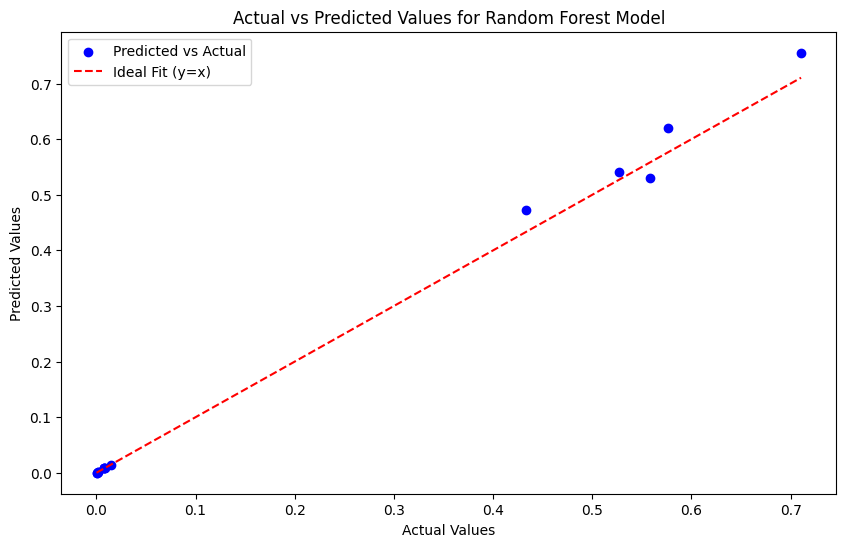

In [102]:
import matplotlib.pyplot as plt

# Step 1: Create a scatter plot to compare actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Step 2: Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Model')

# Step 3: Show the plot
plt.legend()
plt.show()


Mean Squared Error: 0.00046586889163628177
R2 Score: 0.9936834088923973


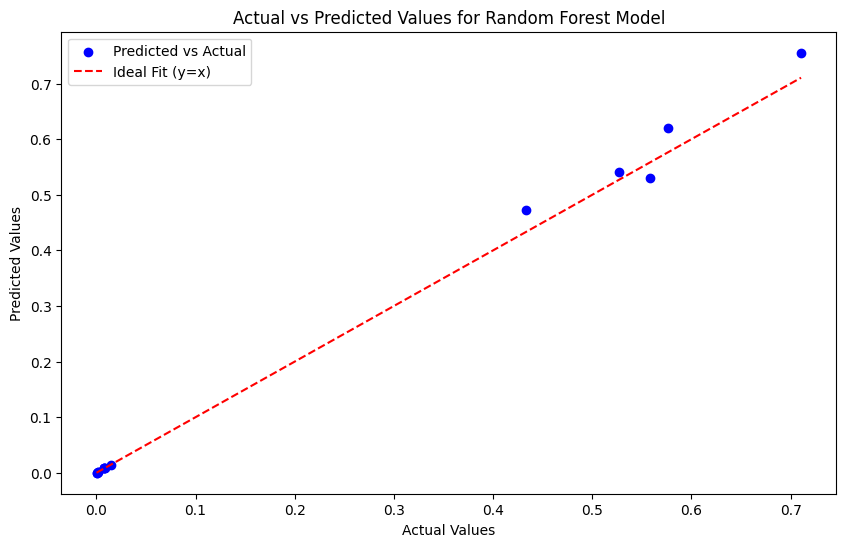

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the dataset
df_flour = pd.read_csv('flour.csv')

# Step 2: Drop the 'Commodity' column as it is not needed for prediction
df_flour = df_flour.drop(columns=['Commodity'])

# Step 3: One-hot encode the 'Attribute' column
df_flour = pd.get_dummies(df_flour, columns=['Attribute'], drop_first=False)

# Step 4: Normalize the 'Value' column
scaler = MinMaxScaler()
df_flour['Value'] = scaler.fit_transform(df_flour[['Value']])

# Step 5: Define the features (X) and target (y)
X = df_flour.drop(columns=['Value'])  # Features
y = df_flour['Value']  # Target variable

# Step 6: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Create and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 9: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Step 10: Create a scatter plot to compare actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Step 11: Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Model')

# Step 12: Show the plot
plt.legend()
plt.show()


In [112]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Step 1: Load and prepare data
df_flour = pd.read_csv('flour.csv')

# Convert 'Year' column to a datetime object, assuming Year is in integer format
df_flour['Year'] = pd.to_datetime(df_flour['Year'], format='%Y')

# Step 2: Set 'Year' as the index
df_flour.set_index('Year', inplace=True)

# Step 3: Set the frequency of the index to yearly ('Y')
df_flour = df_flour.asfreq('Y')

# Make sure you're only using 'Value' for forecasting
df_flour = df_flour[['Value']]

# Step 4: Create and train an ARIMA model
model = ARIMA(df_flour, order=(5, 1, 0))  # ARIMA(p,d,q) parameters
model_fit = model.fit()

# Step 5: Forecasting future values (e.g., 10 years ahead)
forecast = model_fit.forecast(steps=10)

# Step 6: Create a new time index for the forecasted values
forecast_index = pd.date_range(df_flour.index[-1], periods=11, freq='Y')[1:]

# Step 7: Plot actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df_flour.index, df_flour['Value'], label='Actual Values')
plt.plot(forecast_index, forecast, label='Forecasted Values', color='red')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Actual vs Forecasted Values for the Next 10 Years')
plt.legend()
plt.show()


ValueError: cannot reindex on an axis with duplicate labels

Mean Absolute Error: 0.19453124941641997
Root Mean Squared Error: 0.324181365148842


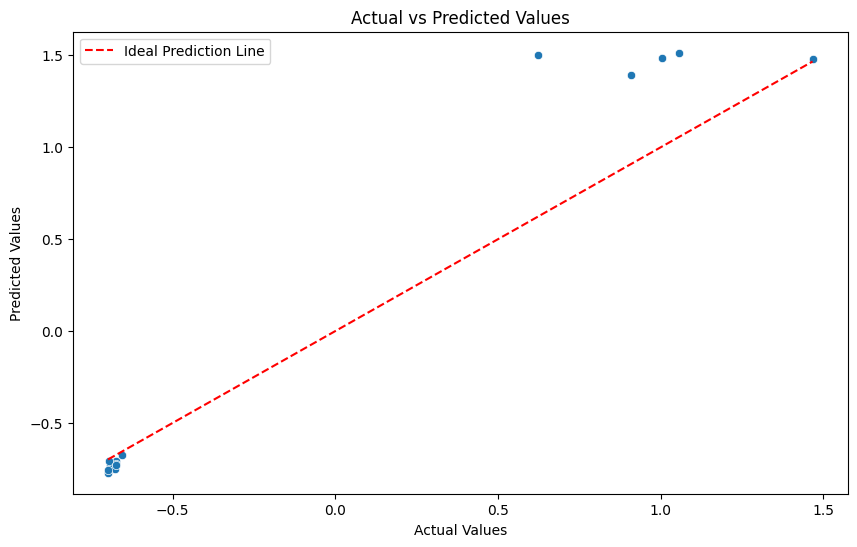

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df_flour = pd.read_csv('flour.csv')

# 1. Data Preprocessing
# Drop 'Commodity' column since it has only one unique value
df_flour.drop('Commodity', axis=1, inplace=True)

# One-hot encode the 'Attribute' column
df_flour = pd.get_dummies(df_flour, columns=['Attribute'], drop_first=True)

# Normalize the 'Value' column
scaler = StandardScaler()
df_flour['Value'] = scaler.fit_transform(df_flour[['Value']])

# 2. Splitting the data into features (X) and target (y)
X = df_flour.drop('Value', axis=1)  # Features
y = df_flour['Value']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model - Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred = model.predict(X_test)

# 5. Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

# 6. Plot the predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()


In [115]:
from sklearn.ensemble import RandomForestRegressor

# 1. Data Preprocessing
# Drop 'Commodity' column since it has only one unique value
df_flour.drop('Commodity', axis=1, inplace=True)

# One-hot encode the 'Attribute' column
df_flour = pd.get_dummies(df_flour, columns=['Attribute'], drop_first=True)

# Normalize the 'Value' column
scaler = StandardScaler()
df_flour['Value'] = scaler.fit_transform(df_flour[['Value']])

# 2. Splitting the data into features (X) and target (y)
X = df_flour.drop('Value', axis=1)  # Features
y = df_flour['Value']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model - Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# 5. Evaluate the model performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Random Forest - Mean Absolute Error: {mae_rf}")
print(f"Random Forest - Root Mean Squared Error: {rmse_rf}")

# 6. Plot the predictions vs actual values for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest - Actual vs Predicted Values')
plt.legend()
plt.show()


KeyError: "['Commodity'] not found in axis"

In [116]:
print(df_flour.columns)


Index(['Year', 'Value', 'Attribute_Farm value-Dollars',
       'Attribute_Retail price-Dollars'],
      dtype='object')


Random Forest - Mean Absolute Error: 0.03764577697089265
Random Forest - Root Mean Squared Error: 0.0649509059004833


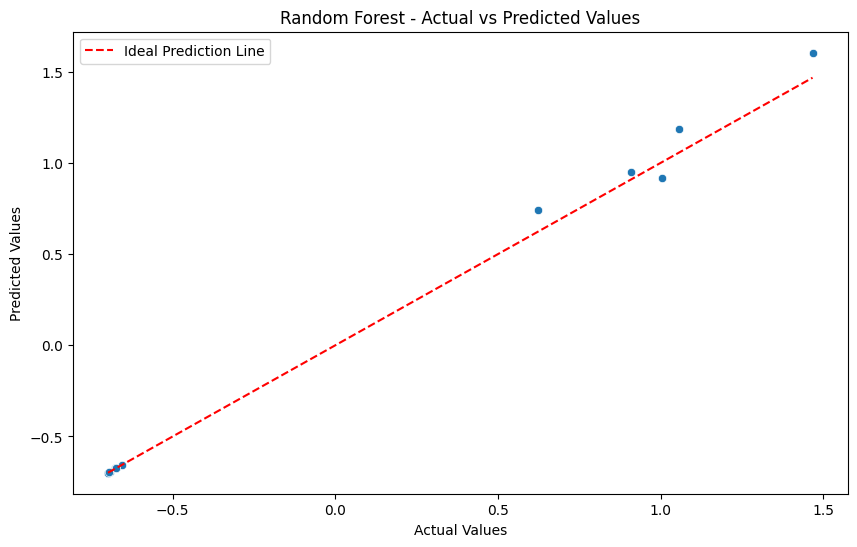

In [118]:
df_flour = pd.read_csv('flour.csv')
from sklearn.ensemble import RandomForestRegressor

# 1. Data Preprocessing
# Drop 'Commodity' column since it has only one unique value
df_flour.drop('Commodity', axis=1, inplace=True)

# One-hot encode the 'Attribute' column
df_flour = pd.get_dummies(df_flour, columns=['Attribute'], drop_first=True)

# Normalize the 'Value' column
scaler = StandardScaler()
df_flour['Value'] = scaler.fit_transform(df_flour[['Value']])

# 2. Splitting the data into features (X) and target (y)
X = df_flour.drop('Value', axis=1)  # Features
y = df_flour['Value']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model - Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# 5. Evaluate the model performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)

print(f"Random Forest - Mean Absolute Error: {mae_rf}")
print(f"Random Forest - Root Mean Squared Error: {rmse_rf}")

# 6. Plot the predictions vs actual values for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest - Actual vs Predicted Values')
plt.legend()
plt.show()


In [119]:
df_flour

,Year,Value,Attribute_Farm value-Dollars,Attribute_Retail price-Dollars
0,2000,-0.676954,False,True
1,2000,-0.699348,True,False
2,2000,0.824508,False,False
3,2001,-0.675837,False,True
4,2001,-0.698910,True,False
...,...,...,...,...
64,2021,-0.692845,True,False
65,2021,2.005345,False,False
66,2022,-0.658128,False,True
67,2022,-0.688706,True,False
